In [2]:
import pandas as pd
import keras
import tensorflow as tf
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns;
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
raw = pd.read_csv(
    "Regular_Dataset.csv"
)
print("Raw data Shape: ", raw.shape)
raw.head()
data = pd.DataFrame()

Raw data Shape:  (2636, 272)


['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HPossessionPercent', 'HNonPenaltyGoals', 'HPenaltyKicksMade', 'HPenaltyKicksAttempted', 'HPenaltyKicksMissed', 'HPassesCompleted_All', 'HPassesAttempted_All', 'HPassCompletion_All', 'HKeyPasses', 'H1/3', 'HPassesIntoPenaltyArea', 'HCrossesIntoPenaltyArea', 'HProgressivePasses', 'HTotalPassDistance', 'HProgressivePassDistance', 'HPassesCompleted_5to15yds', 'HPassesAttempted_5to15yds', 'HPassCompletion_5to15yds', 'HPassesCompleted_15to30yds', 'HPassesAttempted_15to30yds', 'HPassCompletion_15to30yds', 'HPassesCompleted_Over30yds', 'HPassesAttempted_Over30yds', 'HPassCompletion_Over30yds', 'HShotCreatingActions', 'HLiveBallPassesLeadingToShot', 'HDeadBallPassesLeadingToShot', 'HTakeOnsLeadingToShot', 'HShotsLeadingToAnotherShot', 'HFoulsDrawnLeadingToShot', 'HDefensiveActionsLeadingToShot', 'HGoalsScoredAllowed', 'HTotalShots', 'HShotsOnTarget', 'HShotsFromFreeKicks', 'HTkl', 'HTklW'

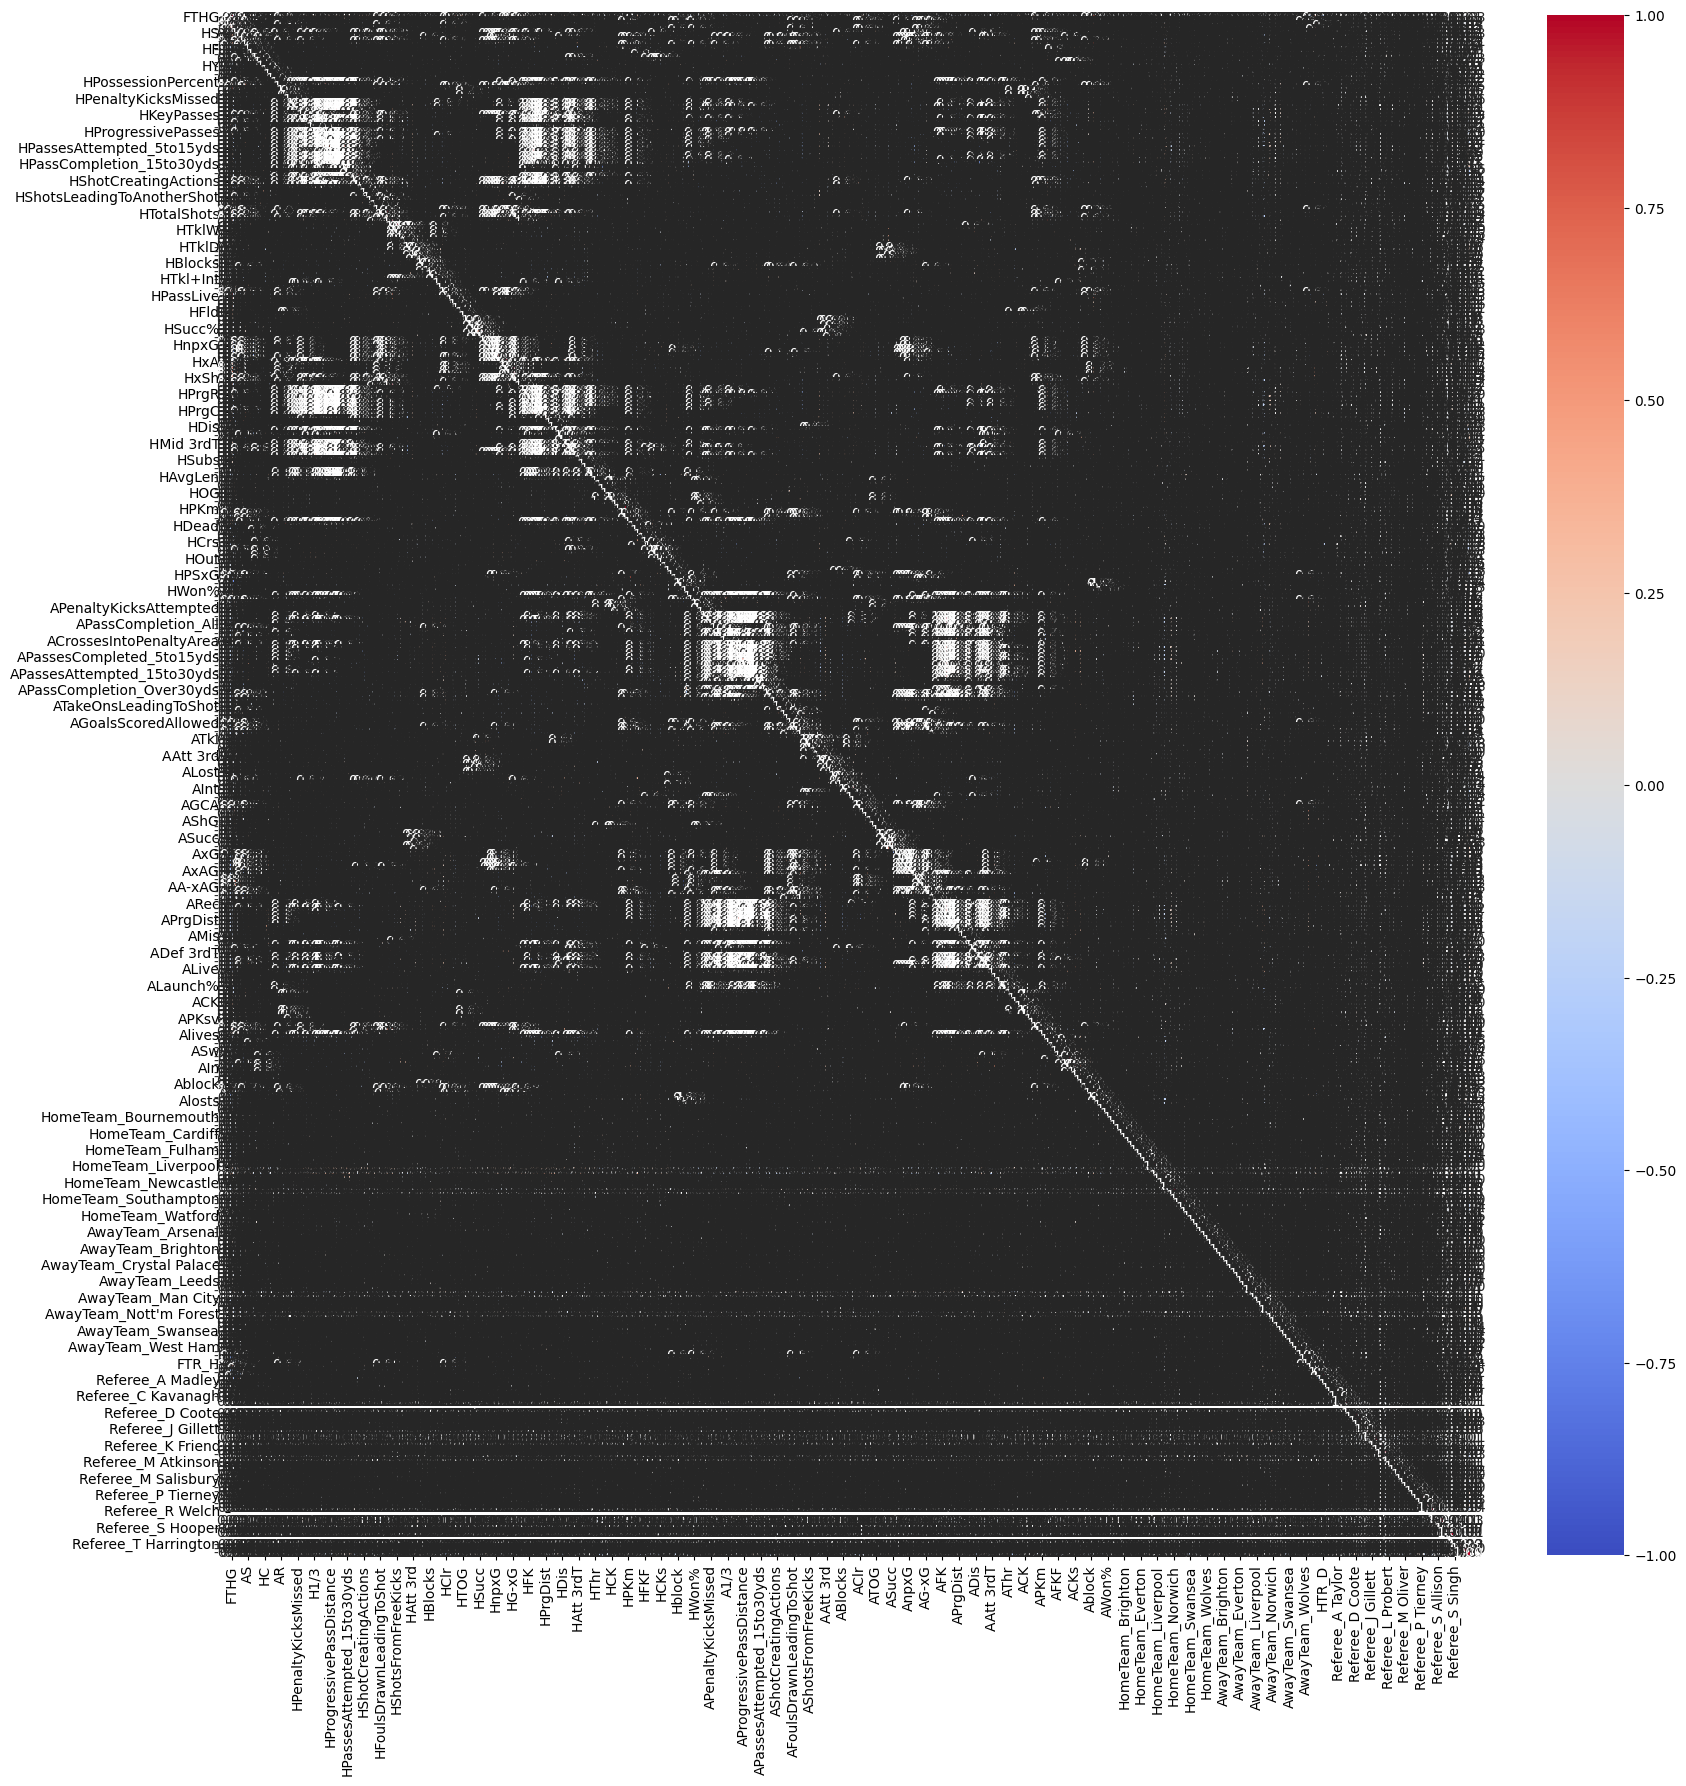

In [4]:
categorical_columns = ['HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']
numerical_columns = [column for column in raw.columns.values if column not in categorical_columns + ['Date']]

for column in numerical_columns:
    raw[column] = pd.to_numeric(raw[column], errors='coerce')
one_hot_encoded_columns = [pd.get_dummies(raw[column], prefix=column) for column in categorical_columns]
data = pd.concat([raw[numerical_columns]] + one_hot_encoded_columns, axis=1)
data['year'] = pd.to_datetime(raw['Date'], dayfirst=True).dt.year

# Split the data into training, validation, and test sets
train_data = data[data['year'] <= 2021]
val_data = data[data['year'] == 2022]
test_data = data[data['year'].between(2023, 2024)]

X_bcc = [x for x in train_data.columns.values]
print(X_bcc)
corr_columns = [col for col in X_bcc if col != 'year']
corr_coeffs = train_data.corr()
# Plot the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_coeffs, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1.0, vmax=1.0)
plt.show()

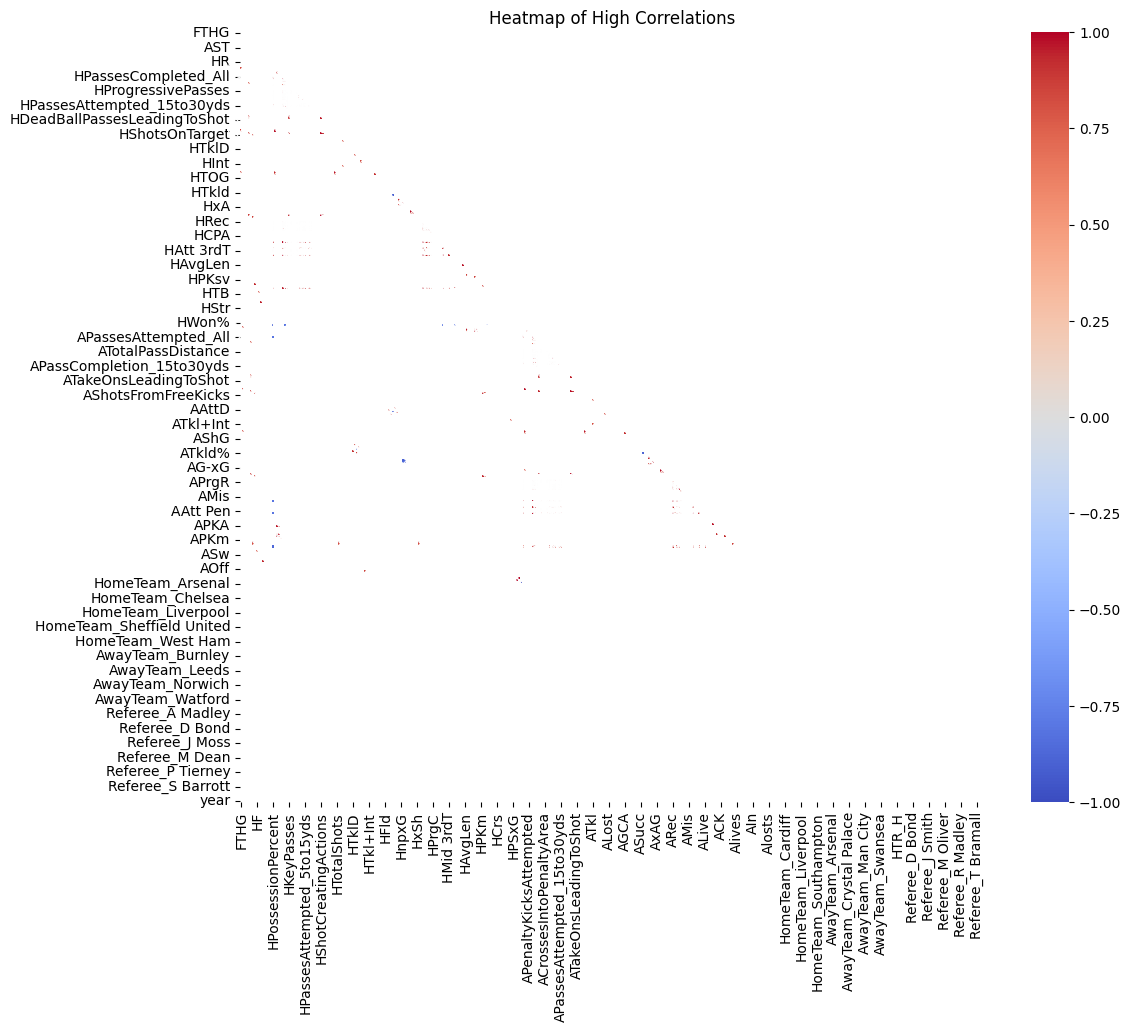

In [ ]:
threshold = 0.8
high_corr = corr_coeffs[(abs(corr_coeffs) >= threshold) & (corr_coeffs != 1)]
mask = np.triu(np.ones_like(high_corr, dtype=bool))

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask,
            center=0, vmin=-1.0, vmax=1.0)
plt.title('Heatmap of High Correlations')
plt.show()

In [ ]:
non_zero_cols = high_corr.columns[(high_corr.abs().sum() > 0)]
filtered_data = data[non_zero_cols]

filtered_data.to_csv('Filtered_Data.csv', index=False)
print("Number of columns with significant correlation:", len(non_zero_cols))
print("Filtered data saved with significant correlations.")

Number of columns with significant correlation: 159
Filtered data saved with significant correlations.
